Name: Kaiyue Ma
Student Number: 1006714129

Part I

In [104]:
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt;
url = 'https://github.com/Kaiyue2003/STA365-Assignments/blob/main/Life%20Expectancy%20Data.csv?raw=true'
data = pd.read_csv(url)

In [105]:
cleaned_data = data.dropna()
cleaned_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


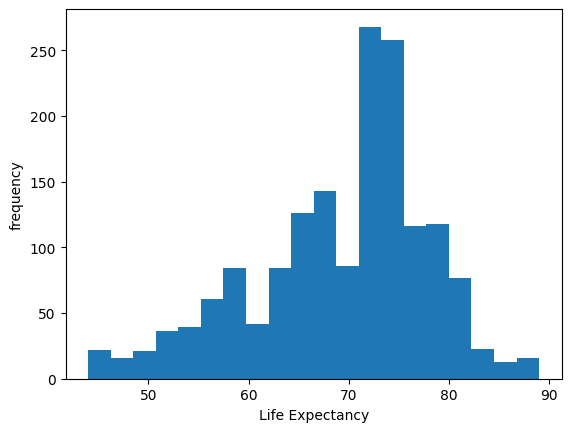

In [106]:
# Exploratory Data Analysis
plt.hist(cleaned_data['Life expectancy '],bins=20)
plt.xlabel('Life Expectancy')
plt.ylabel('frequency')
plt.show()

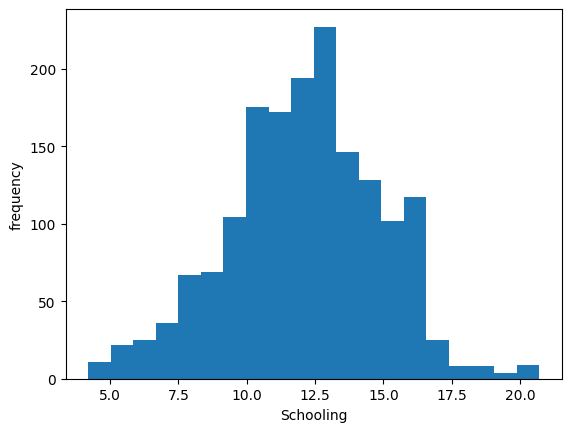

In [107]:
plt.hist(cleaned_data['Schooling'],bins=20)
plt.xlabel('Schooling')
plt.ylabel('frequency')
plt.show()

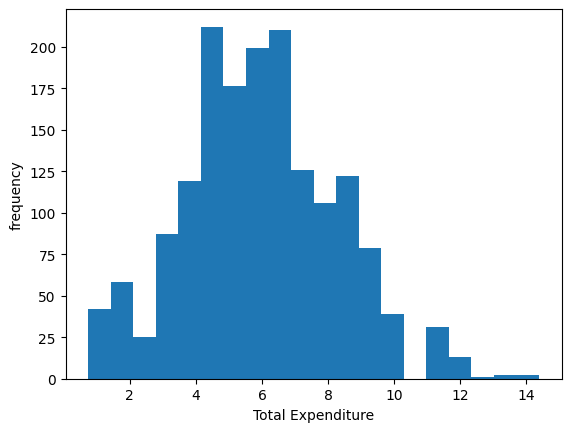

In [108]:
plt.hist(cleaned_data['Total expenditure'],bins=20)
plt.xlabel('Total Expenditure')
plt.ylabel('frequency')
plt.show()

In [109]:
x1 = cleaned_data['Schooling']
x2 = cleaned_data['Total expenditure']
num_obs = len(x1)
intercept = np.ones((num_obs,1))
X = np.zeros((len(x1),3))
# standardize X
X[:, 0] = intercept.reshape(-1)
X[:,1] = x1
X[:,2] = x2
print(X)

[[ 1.   10.1   8.16]
 [ 1.   10.    8.18]
 [ 1.    9.9   8.13]
 ...
 [ 1.   10.    6.53]
 [ 1.    9.8   6.16]
 [ 1.    9.8   7.1 ]]


In [119]:
y = np.zeros((num_obs,1))
y[:,0] = cleaned_data['Life expectancy ']
print(y)

[[65. ]
 [59.9]
 [59.9]
 ...
 [44.8]
 [45.3]
 [46. ]]


In [ ]:
# The chain works very well. There is no need to adjust the priors.
import pymc as pm; import numpy as np;
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((3,1)), cov=np.eye(3), shape=(3,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)
with MLR:
    idata = pm.sample()

HMC Split-Rhats {'betas': array([[1.0048, 1.0014, 1.0004],
       [1.0012, 1.0003, 1.0013],
       [1.0004, 0.9999, 1.0009]]), 'sigma': 1.0006} | 

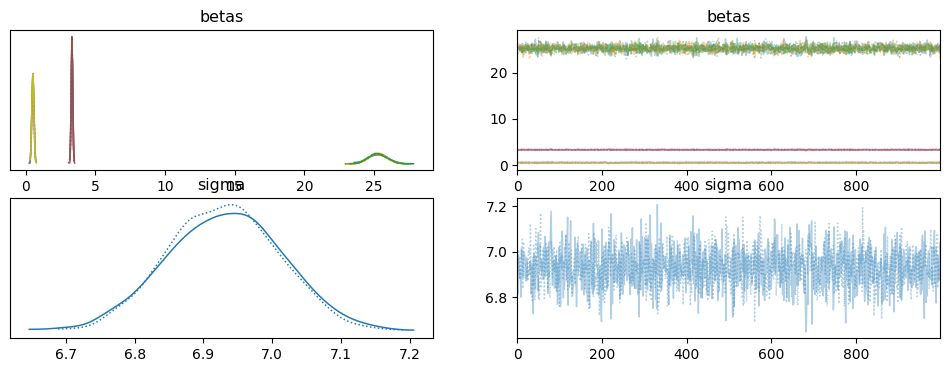

In [ ]:
# Notice that none of the split-R hats exceeds the 1.05 boundary, so that we fail to conclude that the two chains diverge from each other.
# Moreover, betas and sigma chains seem to be rather stationary.
import arviz as az; import matplotlib.pyplot as plt;
az.plot_trace(idata);
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata).items()}, end=' | ')

PART II 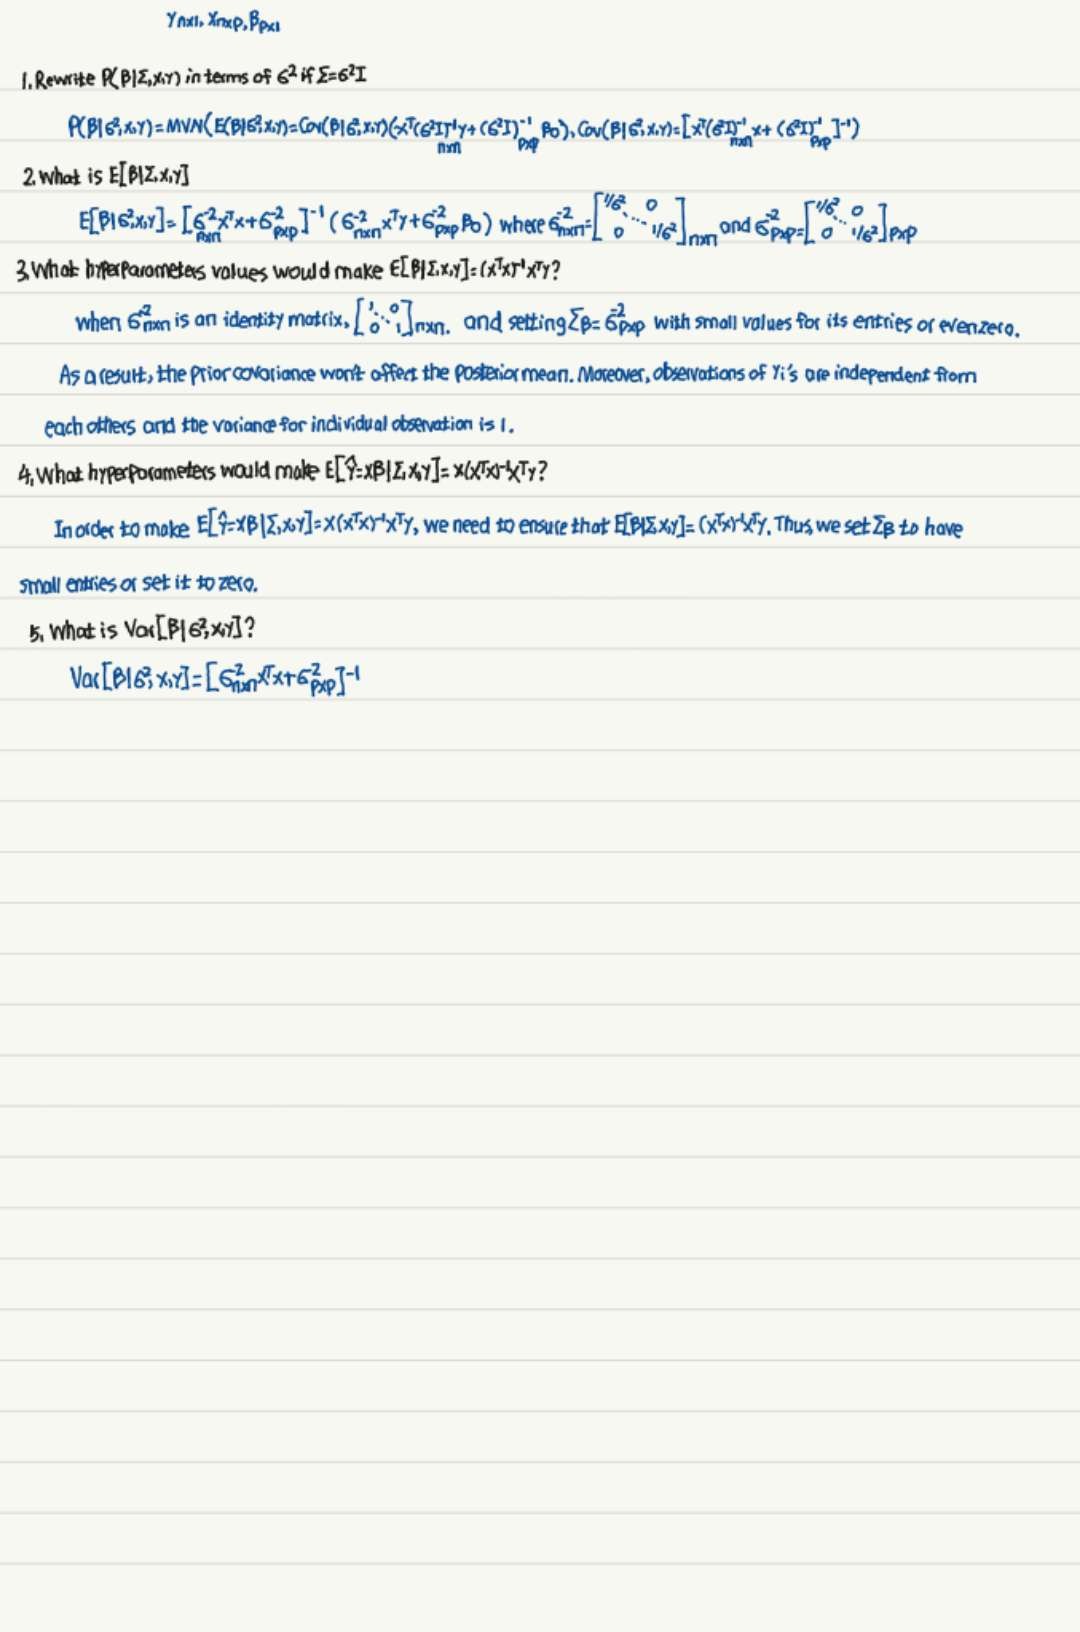

Part III

In [120]:
# Although this process runs really slow, none of the chain shows evident signs of divergence.
import numpy as np; from scipy import stats
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=3, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    L = pm.expand_packed_triangular(3, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T)) # Don't use a covariance matrix parameterization
    mu = pm.MvNormal('mu', mu=np.array(70), cov=np.eye(3), shape=3); # I have changed mean to 70 which is close to the real value of y
    y = pm.MvNormal('y', mu=mu, cov=Sigma, observed=y)
    # Figure out how to parameterize this with a Cholesky factor to improve computational efficiency
with MNV_LKJ:
    idata = pm.sample()